In [7]:
#!/usr/bin/env python

import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif'] = 'SimHei'
%matplotlib inline
def loadData():
    data = pd.read_csv('../第6次作业/PCA数据集/imports-85.data', header=None)
    data.columns = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
    data = data.replace('?',np.nan).dropna().reset_index(drop=True)
    return data

def oneHotEncodeData(data):
    labelEncodeColumns = ['make','body-style','aspiration','fuel-type','engine-location','drive-wheels','engine-type','fuel-system','num-of-doors','num-of-cylinders']
    enc = OneHotEncoder(sparse = False)
    for key in labelEncodeColumns:
        temp = pd.DataFrame(enc.fit_transform(data[[key]]))
        for i in range(temp.shape[1]):
            temp.rename(columns={ temp.columns[i]: key + "_" + str(i) }, inplace=True)
        data.drop([key], axis=1, inplace=True)
        data = pd.concat([data,temp], axis=1)
    return data.astype('double')

def PAC(data):
    matrixData = np.mat(data)
    covData = np.cov(np.array(matrixData).T)
    meanData = matrixData - matrixData.mean(axis=0)
    w,v = np.linalg.eig(covData)
    v = v.real
    w = w.real
    res = []
    sumW = w.sum()
    for i in range(20):
        tem = 0
        for j in range(i+1):
            tem += w[j]
        res.append(tem/sumW)
    X = [i for i in range(1,21)]
    #v_ = np.mat(v[:,0]).T
    #y = meanData * v_


if __name__ == '__main__':
    data = loadData()
    data = oneHotEncodeData(data)
    #PAC(data)
    print('Well done')


Well done


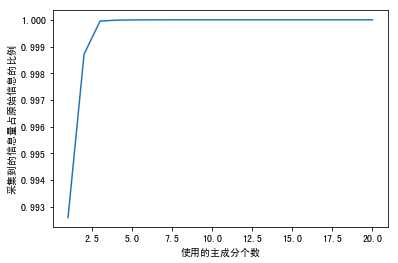

In [8]:
def PAC(data):
    matrixData = np.mat(data)
    covData = np.cov(np.array(matrixData).T)
    meanData = matrixData - matrixData.mean(axis=0)
    w,v = np.linalg.eig(covData)
    v = v.real
    w = w.real
    res = []
    sumW = w.sum()
    for i in range(20):
        tem = 0
        for j in range(i+1):
            tem += w[j]
        res.append(tem/sumW)
    X = [i for i in range(1,21)]
    
    plt.figure()
    plt.xlabel(u"使用的主成分个数")
    plt.ylabel(u"采集到的信息量占原始信息的比例")
    plt.plot(X, res)
    plt.show()
    
PAC(data)